In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import charset_normalizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv


In [3]:
with open('/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv','rb') as raw:
    result = charset_normalizer.detect(raw.read(10000000000))
    print(f'Encoding: {result}')

Encoding: {'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


In [4]:
stress = pd.read_csv('/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv')

In [5]:
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

All columns are of integer type.

In [6]:
stress['blood_pressure'].value_counts(bins=10)

blood_pressure
(2.8, 3.0]      500
(0.997, 1.2]    300
(1.8, 2.0]      300
(1.2, 1.4]        0
(1.4, 1.6]        0
(1.6, 1.8]        0
(2.0, 2.2]        0
(2.2, 2.4]        0
(2.4, 2.6]        0
(2.6, 2.8]        0
Name: count, dtype: int64

In [7]:
stress['mental_health_history'].value_counts()

mental_health_history
0    558
1    542
Name: count, dtype: int64

(array([0, 1, 2]), [Text(0, 0, '2'), Text(1, 0, '1'), Text(2, 0, '0')])

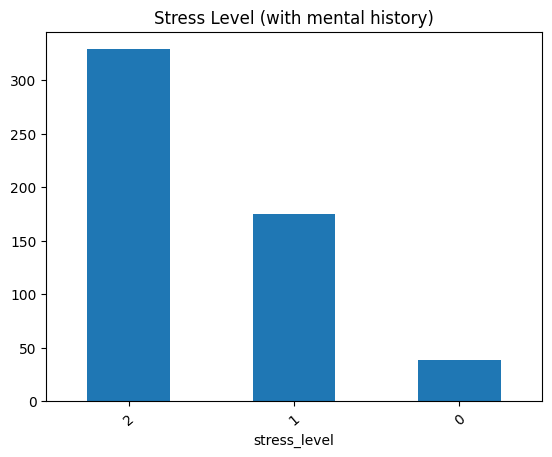

In [8]:
stress[stress['mental_health_history']==1]['stress_level'].value_counts().plot.bar()
plt.title('Stress Level (with mental history)')
plt.xticks(rotation=40)

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

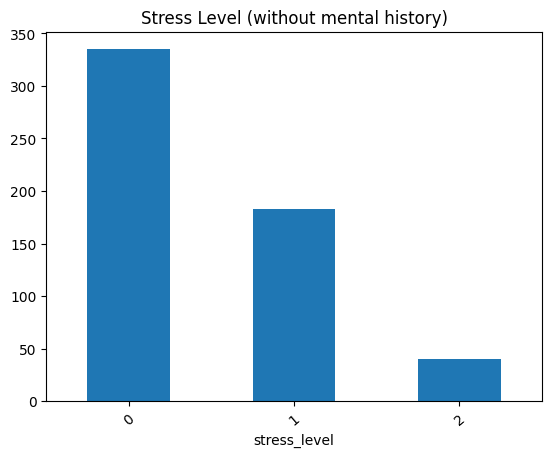

In [9]:
stress[stress['mental_health_history']==0]['stress_level'].value_counts().plot.bar()
plt.title('Stress Level (without mental history)')
plt.xticks(rotation=40)

creating a model to predict stress level.
Going to check for which variables have a correlation with stress level.

In [10]:
stress.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

Text(0.5, 1.0, 'Correlations')

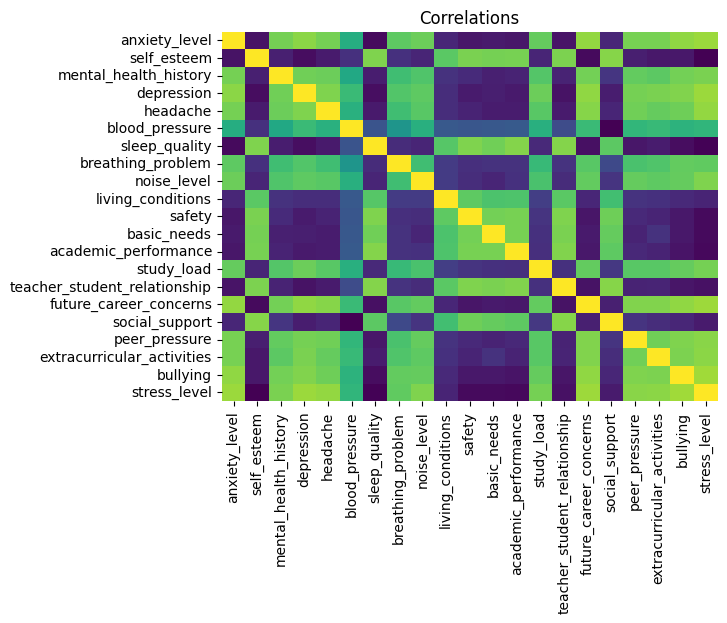

In [12]:
sns.heatmap(stress.corr(),cmap='viridis',cbar=False)
plt.title('Correlations')

The closer to yellow the stronger the correlation.

Depression and Stress level have a strong correlation.

In [13]:
stress['depression'].corr(stress['stress_level'])

0.7343785737506862

a value of 0.73 confirms the strong correlation.

In [23]:
stress.corr()['stress_level']>0.7

anxiety_level                    True
self_esteem                     False
mental_health_history           False
depression                       True
headache                         True
blood_pressure                  False
sleep_quality                   False
breathing_problem               False
noise_level                     False
living_conditions               False
safety                          False
basic_needs                     False
academic_performance            False
study_load                      False
teacher_student_relationship    False
future_career_concerns           True
social_support                  False
peer_pressure                   False
extracurricular_activities      False
bullying                         True
stress_level                     True
Name: stress_level, dtype: bool

using these features to predict stress level since they have a strong correlation with it('stress_level')

In [24]:
X = stress[['anxiety_level','depression','headache','future_career_concerns','bullying']]
y = stress['stress_level']


Using logistic regression because i am trying to predict a discrete variable.

In [29]:
model = LogisticRegression()
train_X,test_X,var_y,test_y=train_test_split(X,y,test_size=0.25,random_state=0)

In [30]:
model.fit(train_X,var_y)
y_pred =model.predict(test_X)#prediction
accuracy = np.mean(test_y==y_pred)
print(accuracy)

0.9090909090909091


the model has an accuracy of 90 percent.

going to try to use decision tree.

In [34]:
model2 = DecisionTreeClassifier(random_state=0)
model2.fit(train_X,var_y)
y_pred2 =model2.predict(test_X)#prediction
accuracy2 = np.mean(test_y==y_pred2)
print(accuracy2)

0.9236363636363636


the second model has an accuracy of 92 percent.